In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:

yf.pdr_override()

start = '2005-01-01'
end = '2024-05-01'

df = pdr.get_data_yahoo('GOOG', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912
2005-01-06,4.858788,4.879212,4.675475,4.696148,4.696148,417041336
2005-01-07,4.748203,4.838116,4.701876,4.828153,4.828153,387964757


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,156.009995,159.184998,155.660004,157.949997,157.949997,17243900
2024-04-23,158.589996,160.479996,157.964996,159.919998,159.919998,16115400
2024-04-24,159.089996,161.389999,158.820007,161.100006,161.100006,19485700
2024-04-25,153.360001,158.279999,152.768005,157.949997,157.949997,36197800
2024-04-26,175.990005,176.419998,171.399994,173.690002,173.690002,55186700


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
1,2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2,2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912
3,2005-01-06,4.858788,4.879212,4.675475,4.696148,4.696148,417041336
4,2005-01-07,4.748203,4.838116,4.701876,4.828153,4.828153,387964757


In [5]:
df = df.drop(['Date','Adj Close'],axis=1)


In [6]:
df.head()

,Open,High,Low,Close,Volume
0,4.916571,5.071989,4.868253,5.048826,636143518
1,5.016198,5.054305,4.818937,4.844342,552298420
2,4.818190,4.904118,4.787804,4.819685,330698912
3,4.858788,4.879212,4.675475,4.696148,417041336
4,4.748203,4.838116,4.701876,4.828153,387964757


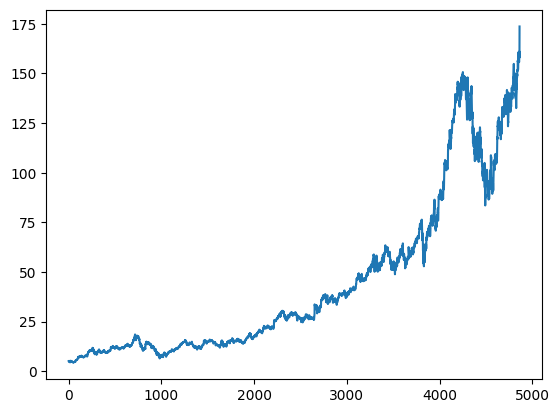

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,4.916571,5.071989,4.868253,5.048826,636143518
1,5.016198,5.054305,4.818937,4.844342,552298420
2,4.818190,4.904118,4.787804,4.819685,330698912
3,4.858788,4.879212,4.675475,4.696148,417041336
4,4.748203,4.838116,4.701876,4.828153,387964757
...,...,...,...,...,...
4857,156.009995,159.184998,155.660004,157.949997,17243900
4858,158.589996,160.479996,157.964996,159.919998,16115400
4859,159.089996,161.389999,158.820007,161.100006,19485700
4860,153.360001,158.279999,152.768005,157.949997,36197800


In [9]:
moving_average100 = df.Close.rolling(100).mean()
moving_average100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4857    144.588999
4858    144.802000
4859    145.049000
4860    145.289300
4861    145.693000
Name: Close, Length: 4862, dtype: float64

In [10]:
moving_average100[98]


nan

In [11]:
moving_average100[99]

4.972016229629516

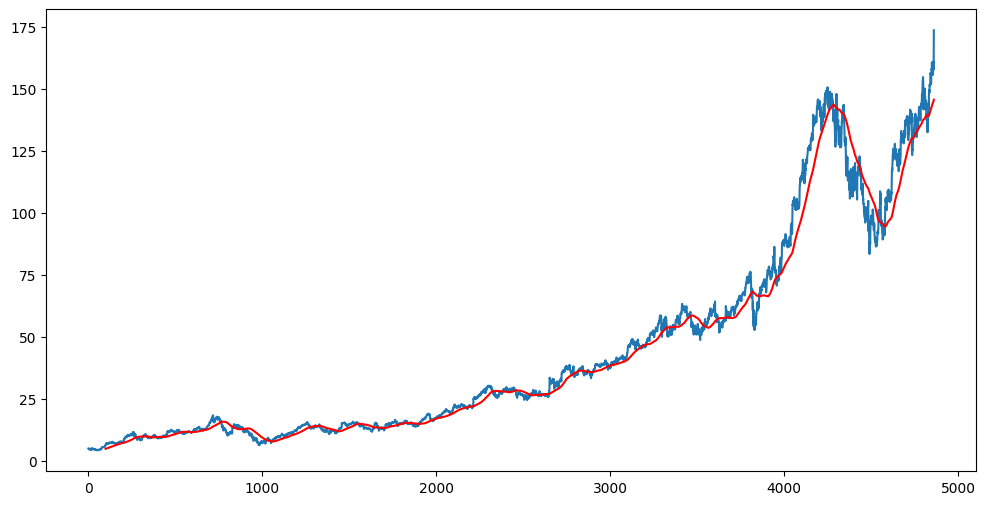

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average100,'r')

In [13]:
moving_average200 = df.Close.rolling(200).mean()

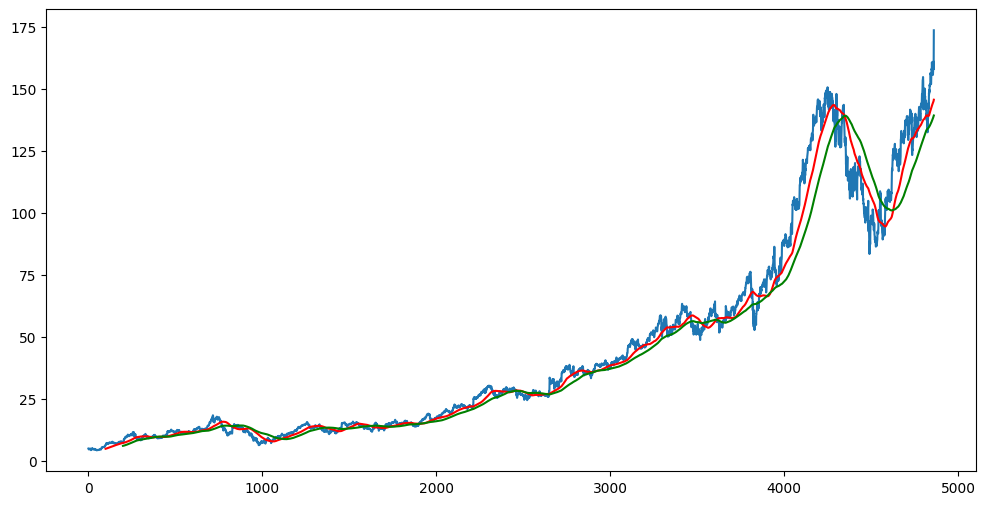

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average100,'r')
plt.plot(moving_average200,'g')

In [15]:
df

,Open,High,Low,Close,Volume
0,4.916571,5.071989,4.868253,5.048826,636143518
1,5.016198,5.054305,4.818937,4.844342,552298420
2,4.818190,4.904118,4.787804,4.819685,330698912
3,4.858788,4.879212,4.675475,4.696148,417041336
4,4.748203,4.838116,4.701876,4.828153,387964757
...,...,...,...,...,...
4857,156.009995,159.184998,155.660004,157.949997,17243900
4858,158.589996,160.479996,157.964996,159.919998,16115400
4859,159.089996,161.389999,158.820007,161.100006,19485700
4860,153.360001,158.279999,152.768005,157.949997,36197800


In [16]:
df.shape

(4862, 5)

In [17]:
#Taining & Test Data Splitting

In [18]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(f"data training: {data_training.shape}")
print(f"data testing: {data_testing.shape}")

data training: (3403, 1)
data testing: (1459, 1)


In [19]:
data_training.head()

,Close
0,5.048826
1,4.844342
2,4.819685
3,4.696148
4,4.828153


In [20]:
data_testing.head()

,Close
3403,57.695000
3404,59.174000
3405,59.441002
3406,59.193001
3407,59.939999


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01268357],
       [0.00892699],
       [0.00847401],
       ...,
       [0.96723529],
       [0.97998478],
       [0.97887331]])

In [23]:
scaler.data_min_

array([4.35841417])

In [24]:
scaler.data_max_

array([58.79199982])

In [25]:
data_training_array.shape

(3403, 1)

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])



In [27]:
#x_train

In [28]:
#y_train

In [29]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train

array([[[0.01268357],
        [0.00892699],
        [0.00847401],
        ...,
        [0.03681528],
        [0.03706695],
        [0.03926781]],

       [[0.00892699],
        [0.00847401],
        [0.00620451],
        ...,
        [0.03706695],
        [0.03926781],
        [0.03853113]],

       [[0.00847401],
        [0.00620451],
        [0.00862958],
        ...,
        [0.03926781],
        [0.03853113],
        [0.04164254]],

       ...,

       [[0.88619159],
        [0.88633855],
        [0.90250506],
        ...,
        [0.95556055],
        [0.93299175],
        [0.95263037]],

       [[0.88633855],
        [0.90250506],
        [0.92071075],
        ...,
        [0.93299175],
        [0.95263037],
        [0.96723529]],

       [[0.90250506],
        [0.92071075],
        [0.9255607 ],
        ...,
        [0.95263037],
        [0.96723529],
        [0.97998478]]])

In [31]:
x_train.shape

(3303, 100, 1)

In [32]:
#ML Model

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=2)


Epoch 1/2

3303/3303 [==============================] - 162s 48ms/step - loss: 9.4591e-04
Epoch 2/2
3303/3303 [==============================] - 169s 51ms/step - loss: 3.5525e-04


In [37]:
#test

In [38]:
data_testing.head()

,Close
3403,57.695000
3404,59.174000
3405,59.441002
3406,59.193001
3407,59.939999


In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

,Close
0,54.476002
1,54.740002
2,55.123001
3,55.567001
4,55.331501


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04536392],
       [0.04747796],
       [0.05054493],
       ...,
       [0.89918244],
       [0.87395795],
       [1.        ]])

In [43]:
input_data.shape

(1559, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [45]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1459, 100, 1)
(1459,)


In [46]:
#making predictions

y_predicted = model.predict(x_test)

46/46 [==============================] - 3s 46ms/step


In [47]:
y_predicted.shape

(1459, 1)

In [48]:
y_predicted

array([[0.05944531],
       [0.06002051],
       [0.06559727],
       ...,
       [0.9058942 ],
       [0.917431  ],
       [0.90706044]], dtype=float32)

In [49]:
y_test

array([0.07114085, 0.08298432, 0.08512241, ..., 0.89918244, 0.87395795,
       1.        ])

In [50]:
scaler.scale_

array([0.00800775])

In [51]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

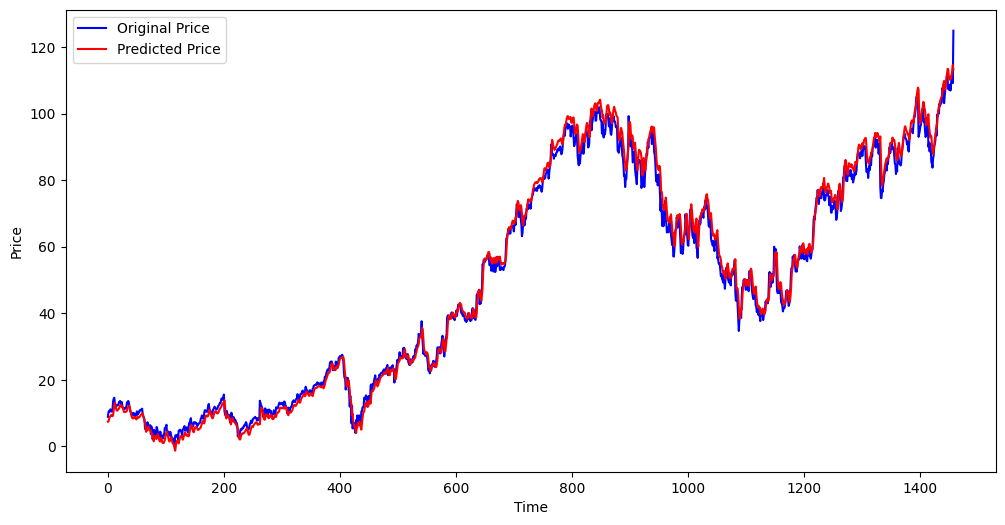

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label  = 'Original Price')
plt.plot(y_predicted, 'r', label  = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
y_test.shape

(1459,)

In [54]:
y_predicted.shape

(1459, 1)

In [55]:
rmse = np.sqrt(np.mean((y_test-y_predicted)**2))
rmse

47.25226376394674

In [56]:
df2=pd.DataFrame(y_test,columns=["Original"])
df3=pd.DataFrame(y_predicted,columns=["Predicted"])

result=pd.concat([df2,df3],axis=1)
result

,Original,Predicted
0,8.883999,7.423471
1,10.362999,7.495301
2,10.630001,8.191721
3,10.382000,8.815469
4,11.128998,8.974822
...,...,...
1454,109.138996,110.561935
1455,111.108997,111.455013
1456,112.289005,113.127166
1457,109.138996,114.567867
